In [1]:
#import required packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.svm import SVC #Support Vector Classifier
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
%matplotlib inline

In [2]:
#wine = pd.read_csv('C:/Users/thenry/OneDrive/Northwestern Data Science Boot Camp/Wine Project/wineQualityReds.csv', sep=',')
wine = pd.read_csv('/Users/marinaduarte/Documents/Project-3-Wine/winemag-data_first150k.csv', sep=',')

In [3]:
wine.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [4]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150930 entries, 0 to 150929
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   150930 non-null  int64  
 1   country      150925 non-null  object 
 2   description  150930 non-null  object 
 3   designation  105195 non-null  object 
 4   points       150930 non-null  int64  
 5   price        137235 non-null  float64
 6   province     150925 non-null  object 
 7   region_1     125870 non-null  object 
 8   region_2     60953 non-null   object 
 9   variety      150930 non-null  object 
 10  winery       150930 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 12.7+ MB


In [5]:
wine.isnull().sum()

Unnamed: 0         0
country            5
description        0
designation    45735
points             0
price          13695
province           5
region_1       25060
region_2       89977
variety            0
winery             0
dtype: int64

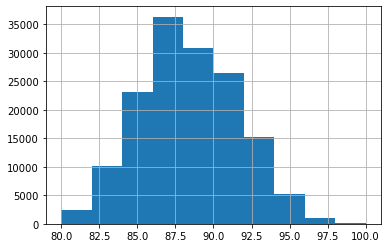

In [6]:
wine.points.hist()

In [7]:
wine.describe()

,Unnamed: 0,points,price
count,150930.000000,150930.000000,137235.000000
mean,75464.500000,87.888418,33.131482
std,43569.882402,3.222392,36.322536
min,0.000000,80.000000,4.000000
25%,37732.250000,86.000000,16.000000
50%,75464.500000,88.000000,24.000000
75%,113196.750000,90.000000,40.000000
max,150929.000000,100.000000,2300.000000


In [8]:
clean_data = wine.drop_duplicates(subset=['description'])


clean_data.dropna(subset=['description', 'points'])

print(len(clean_data))
clean_data.head()

97821


,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [9]:
#Transform method taking points as param
def transform_points_simplified(points):
    if points < 84:
        return 1
    elif points >= 84 and points < 88:
        return 2 
    elif points >= 88 and points < 92:
        return 3 
    elif points >= 92 and points < 96:
        return 4 
    else:
        return 5

#Applying transform method and assigning result to new column "points_simplified"
clean_data = clean_data.assign(points_simplified = clean_data['points'].apply(transform_points_simplified))
clean_data.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery,points_simplified
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz,5
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez,5
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley,5
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi,5
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude,4


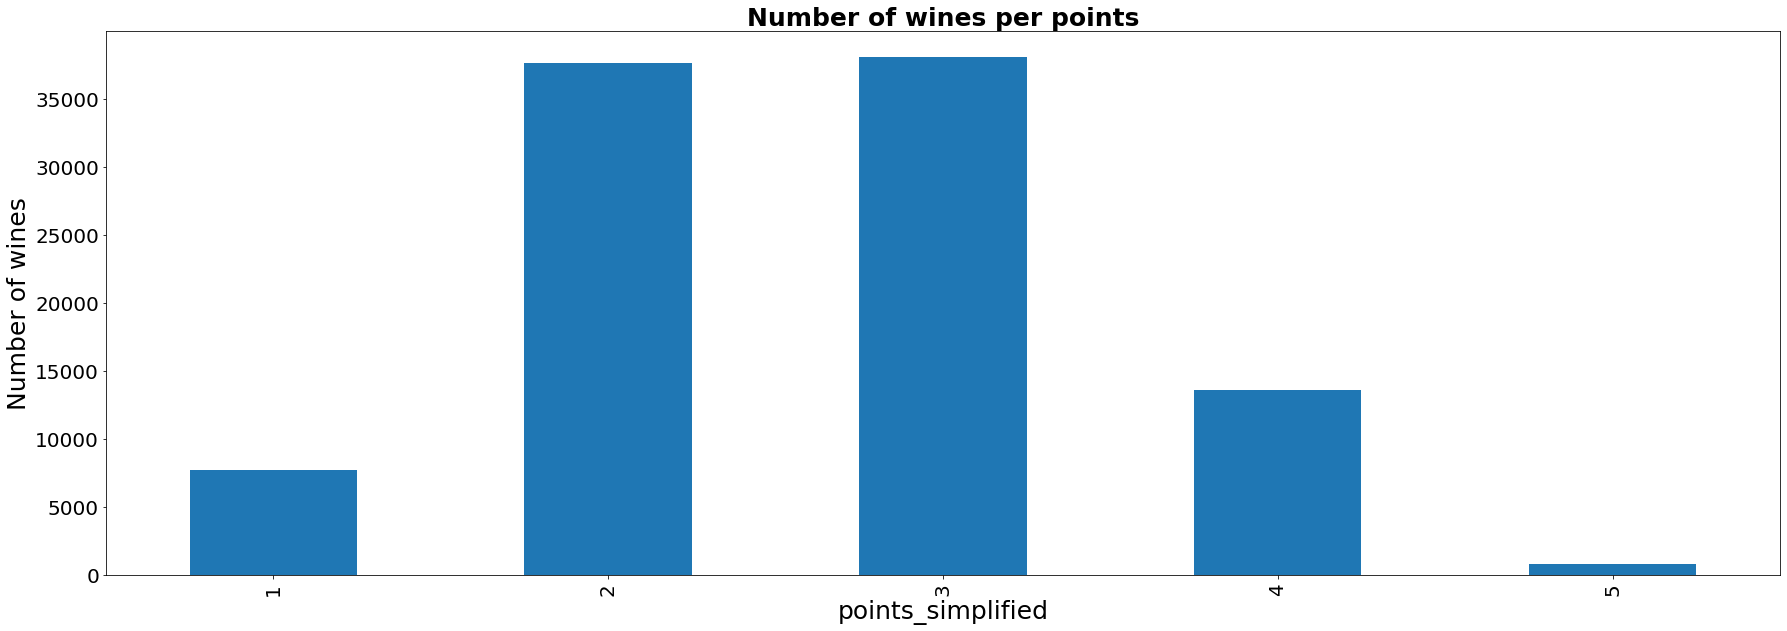

In [10]:
fig, ax = plt.subplots(figsize=(30,10))
plt.xticks(fontsize=20) # X Ticks
plt.yticks(fontsize=20) # Y Ticks
ax.set_title('Number of wines per points', fontweight="bold", size=25) # Title
ax.set_ylabel('Number of wines', fontsize = 25) # Y label
ax.set_xlabel('Points', fontsize = 25) # X label
clean_data.groupby(['points_simplified']).count()['description'].plot(ax=ax, kind='bar')

In [11]:
vectorizer = CountVectorizer(max_features=1500, min_df=5, max_df=0.7, stop_words='english')
X = vectorizer.fit_transform(clean_data["description"]).toarray()

In [12]:
y = clean_data['points_simplified']

In [13]:
#train and test splitting data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [14]:
#apply standard scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [15]:
X_train[:10]

array([[-0.06255303, -0.11521991, -0.11766575, ..., -0.09894931,
        -0.0968379 , -0.05112379],
       [-0.06255303, -0.11521991, -0.11766575, ..., -0.09894931,
        -0.0968379 , -0.05112379],
       [-0.06255303, -0.11521991, -0.11766575, ..., -0.09894931,
        -0.0968379 , -0.05112379],
       ...,
       [-0.06255303, -0.11521991, -0.11766575, ..., -0.09894931,
        -0.0968379 , -0.05112379],
       [-0.06255303, -0.11521991, -0.11766575, ..., -0.09894931,
        -0.0968379 , -0.05112379],
       [-0.06255303, -0.11521991, -0.11766575, ..., -0.09894931,
        -0.0968379 , -0.05112379]])

In [16]:
#3 models
# 1. Random Forest Classifier
# 2. Support Vector Classifier
# 3. Neural Network (MLPClassifier)



In [17]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

In [18]:
#pred_rfc[:20]

In [19]:
#X_test[:20]

In [20]:
print(classification_report(y_test, pred_rfc))
print(confusion_matrix(y_test, pred_rfc))

              precision    recall  f1-score   support

           1       0.77      0.33      0.46      1596
           2       0.65      0.75      0.69      7563
           3       0.57      0.73      0.64      7551
           4       0.77      0.14      0.24      2696
           5       0.00      0.00      0.00       159

    accuracy                           0.62     19565
   macro avg       0.55      0.39      0.41     19565
weighted avg       0.64      0.62      0.59     19565

[[ 522 1005   69    0    0]
 [ 142 5658 1763    0    0]
 [   9 1942 5539   61    0]
 [   3  136 2179  378    0]
 [   0    3  104   52    0]]


/Users/marinaduarte/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
